In [ ]:
# Module Imports - Add any additional modules here
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from google.colab import drive
import os

In [ ]:
#mount the Google Drive filesystem to the notebook's runtime environment
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#unzip zipped folder
!unzip gdrive/My\ Drive/Project/Group_Project_Data_2.zip

Streaming output truncated to the last 5000 lines.
  inflating: Group_Project_Data/Train/Fake/img_2189.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_2189.png  
  inflating: Group_Project_Data/Train/Fake/img_460.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_460.png  
  inflating: Group_Project_Data/Train/Fake/img_1480.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_1480.png  
  inflating: Group_Project_Data/Train/Fake/img_1494.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_1494.png  
  inflating: Group_Project_Data/Train/Fake/img_474.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_474.png  
  inflating: Group_Project_Data/Train/Fake/img_312.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_312.png  
  inflating: Group_Project_Data/Train/Fake/img_2823.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_2823.png  
  inflating: Group_Project_Data/Train/Fake/img_1319.png  
  inflat

In [ ]:
#suppress any output or error messages generated by the unzip command
!unzip gdrive/My\ Drive/Project/Group_Project_Data_2.zip > /dev/null

replace __MACOSX/._Group_Project_Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
#confirm directory
print(os.path.isdir('/content/Group_Project_Data/Train'))

True


In [ ]:
#define training and validation directories
train_image_folder = '/content/Group_Project_Data/Train'
test_image_folder = '/content/Group_Project_Data/Valid'

In [ ]:
# Create training images dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_image_folder,
    labels='inferred',
    label_mode='binary',
    image_size=(64, 64),
    batch_size=128,
    color_mode='grayscale'
)

Found 6000 files belonging to 2 classes.


In [ ]:
# Create testing images dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_image_folder,
    labels='inferred',
    label_mode='binary',
    image_size=(64, 64),
    batch_size=128,
    color_mode='grayscale'
)

Found 2000 files belonging to 2 classes.


In [ ]:
#map class names to class indices
class_names = train_dataset.class_names
print(class_names)

['Fake', 'Real']


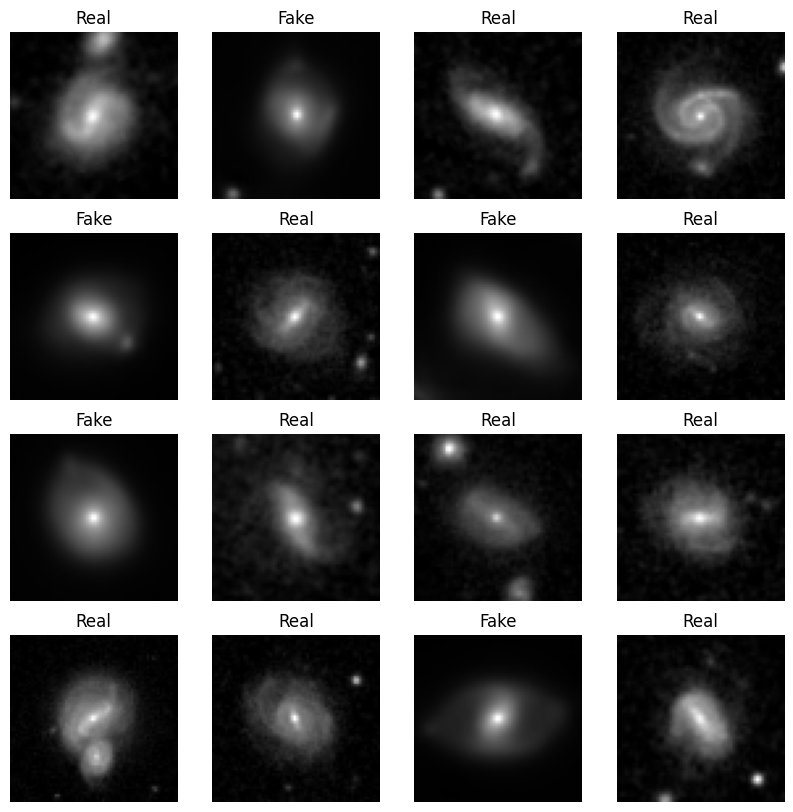

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')
    plt.title(class_names[int(labels.numpy()[i])])
    plt.axis('off')


In [ ]:
#model architecture
input = layers.Input((64,64,1), name='Input')
conv_1 = layers.Conv2D(32, (3,3), activation='relu', padding='same', 
                       name='conv_1')(input)
pool1 = layers.MaxPool2D(pool_size=(2,2), name='pool_1')(conv_1)
conv_2 = layers.Conv2D(32, (3,3), activation='relu', padding='same', 
                       name='conv_2')(pool1)
pool2 = layers.MaxPool2D(pool_size=(2,2), name='pool_2')(conv_2)
conv_3 = layers.Conv2D(64, (3,3), activation='relu', padding='same', 
                       name='conv_3')(pool2)
conv_4 = layers.Conv2D(64, (3,3), activation='relu', padding='same', 
                       name='conv_3')(conv_3)
pool3 = layers.MaxPool2D(pool_size=(2,2), name='pool_3')(conv_3)   
flatten_layer = layers.Flatten(name='flat')(pool3)              
fc_1 = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.001),
                    name='fc_1')(flatten_layer)
output = layers.Dense(1, kernel_regularizer=regularizers.l2(0.001),
                       name='output', activation='sigmoid')(fc_1)

model = models.Model(inputs=input, outputs=output)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64, 64, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 pool_2 (MaxPooling2D)       (None, 16, 16, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 64)        18496     
                                                                 
 pool_3 (MaxPooling2D)       (None, 8, 8, 64)          0     

In [ ]:
# Compile the model with desired hyperparameters
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(train_dataset, validation_data=test_dataset, 
                           epochs=15, batch_size=128)

Epoch 1/15
47/47 [==============================] - 14s 42ms/step - loss: 2.9352 - accuracy: 0.8648 - val_loss: 2.3885 - val_accuracy: 0.9835
Epoch 2/15
47/47 [==============================] - 2s 30ms/step - loss: 2.1701 - accuracy: 0.9922 - val_loss: 1.9722 - val_accuracy: 0.9945
Epoch 3/15
47/47 [==============================] - 1s 28ms/step - loss: 1.8198 - accuracy: 0.9972 - val_loss: 1.6856 - val_accuracy: 0.9970
Epoch 4/15
47/47 [==============================] - 1s 28ms/step - loss: 1.5816 - accuracy: 0.9992 - val_loss: 1.4878 - val_accuracy: 0.9980
Epoch 5/15
47/47 [==============================] - 1s 27ms/step - loss: 1.4076 - accuracy: 0.9995 - val_loss: 1.3335 - val_accuracy: 0.9985
Epoch 6/15
47/47 [==============================] - 2s 40ms/step - loss: 1.2685 - accuracy: 0.9997 - val_loss: 1.2096 - val_accuracy: 0.9980
Epoch 7/15
47/47 [==============================] - 2s 48ms/step - loss: 1.1561 - accuracy: 0.9997 - val_loss: 1.1084 - val_accuracy: 0.9975
Epoch 8/15
4

Text(0.5, 1.0, 'T4.2: Model Accuracy')

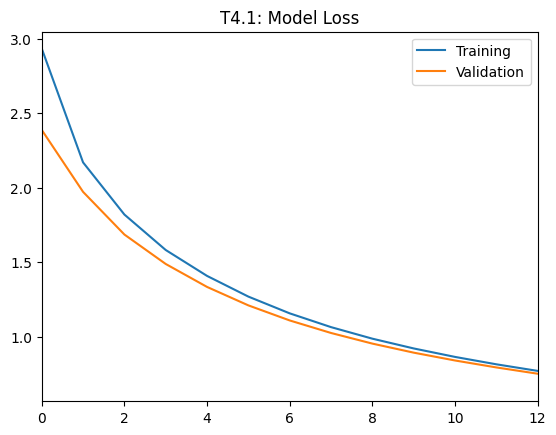

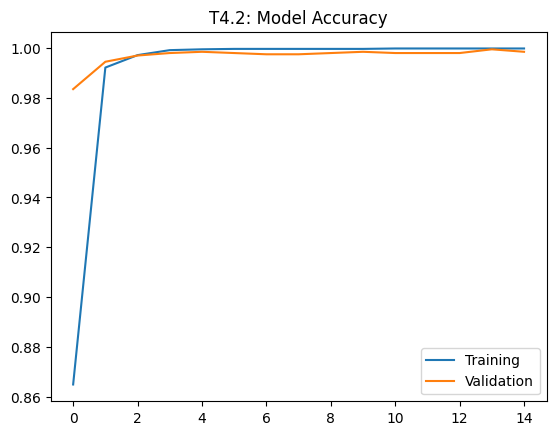

In [ ]:
#Plots of the losses and metrics of the training and validation data,
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('T4.1: Model Loss')
plt.xlim([0,12])

plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('T4.2: Model Accuracy')

In [ ]:
#Create plots of the losses, metrics and
# predicted classifications of images in the test set.

y_pred = model.predict(test_dataset)
y_pred_label = np.argmax(y_pred, axis=1)

16/16 [==============================] - 1s 16ms/step


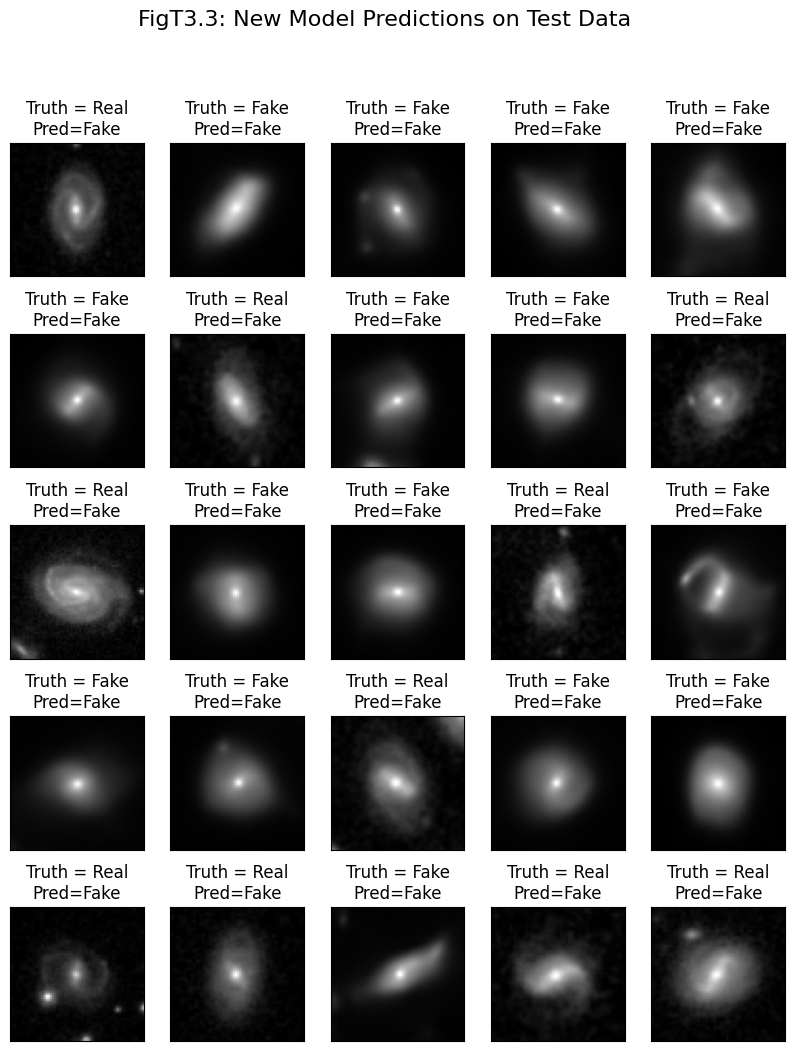

In [ ]:
images, labels = next(iter(test_dataset.take(1)))
images = images.numpy()
labels = labels.numpy()

f, ax = plt.subplots(5,5, figsize=(10,12))
ax = ax.flatten()

for i in range(25):
  ax[i].imshow(images[i], cmap='gray')
  ax[i].set_title(f'Truth = {class_names[int(labels[i])]}\nPred={class_names[y_pred_label[i]]}')
  ax[i].set_xticks([])
  ax[i].set_yticks([])

plt.suptitle('FigT3.3: New Model Predictions on Test Data', fontsize=16)
plt.show()


In [ ]:
# Saving your model

model.save('/content/Group_X_Model_Trained')

In [ ]:
# Test saved model

loaded_model = tf.keras.models.load_model('/content/Group_X_Model_Trained')
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64, 64, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 pool_2 (MaxPooling2D)       (None, 16, 16, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 64)        18496     
                                                                 
 pool_3 (MaxPooling2D)       (None, 8, 8, 64)          0     

In [ ]:
# zip the model
!zip -r /content/Group_X_Model_Trained.zip /content/Group_X_Model_Trained

  adding: content/Group_X_Model_Trained/ (stored 0%)
  adding: content/Group_X_Model_Trained/assets/ (stored 0%)
  adding: content/Group_X_Model_Trained/saved_model.pb (deflated 89%)
  adding: content/Group_X_Model_Trained/variables/ (stored 0%)
  adding: content/Group_X_Model_Trained/variables/variables.data-00000-of-00001 (deflated 5%)
  adding: content/Group_X_Model_Trained/variables/variables.index (deflated 64%)
  adding: content/Group_X_Model_Trained/keras_metadata.pb (deflated 91%)
  adding: content/Group_X_Model_Trained/fingerprint.pb (stored 0%)
